In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [47]:
df


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
dataset=pd.DataFrame(df.data)
print(dataset.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25


In [52]:
dataset.shape

(20640, 8)

In [53]:
dataset.columns=df.feature_names

In [54]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
df.target.shape

(20640,)

In [57]:
# I create a new column to store the target variable
dataset['Price']=df.target

In [58]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
X=dataset.iloc[:,:-1]  # inedependent features
y=dataset.iloc[:,-1]   # dependent features

# Linear regression

In [65]:
#this is used to do cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [67]:
lin_regressor=LinearRegression()
# we are basically doing 5 cross validations
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
# here we get the mean squared error
mean_mse=np.mean(mse)
print(mean_mse)

-0.5582901717686559


# Ridge regression

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [70]:
# initialize ridge obj
ridge=Ridge()
#provide some values for alpha
parameters={'alpha':[1e-15,1e-12,1e-10,1e-8,1e-5,1e-2,1,3,10,20,50,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-05, 0.01, 1,
                                   3, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [72]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-0.5579557674778972


# Lasso Regression
Doesn't perform as good as ridge but is good when we have a large number of features

In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [74]:
# same as for ridge
lasso=Lasso()
parameters={'alpha':[1e-15,1e-12,1e-10,1e-8,1e-5,1e-2,1,3,10,20,40,50,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-05, 0.01, 1,
                                   3, 10, 20, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [75]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
-0.558289383479017


# Comparison

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
predict_lasso=lasso_regressor.predict(X_test)
predict_ridge=ridge_regressor.predict(X_test)

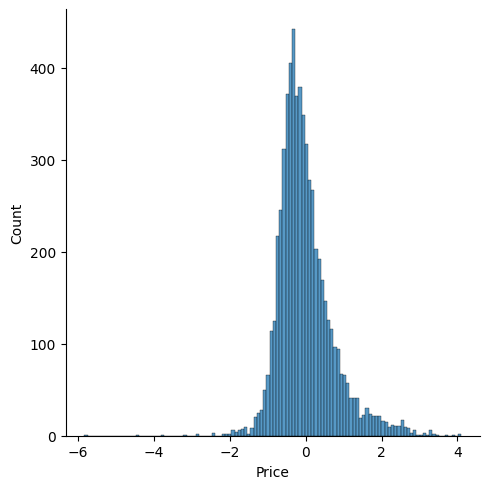

In [80]:
import seaborn as sns

sns.displot(y_test-prediction_lasso)

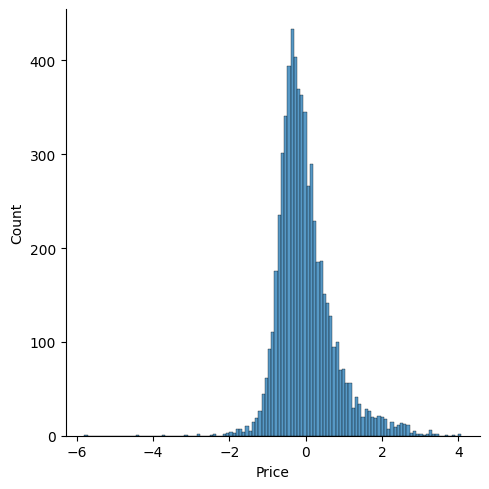

In [81]:
sns.displot(y_test-prediction_ridge)